<a href="https://colab.research.google.com/github/ifeomamegwai/Le-Wagon-python-and-ML/blob/main/Customer_Retention_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 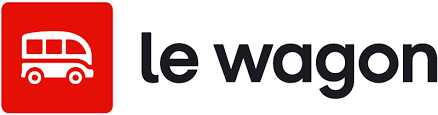

# Greenweez Retention Matrix


In this challenge, we will study the impact of COVID-19 on Greenweez, with a focus on customer retention.



There have been 3 lockdowns in France during the COVID-19 pandemic:


- **March 17 to May 11, 2020**, i.e. 1 month and 25 days;
- **October 30 to December 15, 2020**, i.e. 1 month and 15 days;
- **April 3 to May 3, 2021**, i.e. 28 days.

## Turnover Analysis


### Yearly Analysis



Load Greenweez orders by executing the following cell. \
It may take a few minutes to execute

In [ ]:
from google.colab import auth
import pandas as pd

# Will collect your credentials
auth.authenticate_user()

# Query Bigquery
query = "SELECT * FROM `data-analytics-bootcamp-363212.course30.gwz_orders` ORDER BY date_date"

df_orders = pd.read_gbq(query, project_id="data-analytics-bootcamp-363212")

Convert the column `date_date` to **datetime**.


In [ ]:
#your code here
df_orders.head()


,date_date,orders_id,customers_id,country,department,total_quantity,total_turnover
0,2019-01-01,571,560,FRANCE,77,52,92.71
1,2019-01-01,324,317,FRANCE,39,45,207.62
2,2019-01-01,458,451,FRANCE,68,41,95.33
3,2019-01-01,264,261,FRANCE,81,36,109.13
4,2019-01-01,87,87,FRANCE,54,46,167.21


In [ ]:
df_orders["date_date"]=pd.to_datetime(df_orders['date_date'])
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035446 entries, 0 to 1035445
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   date_date       1035446 non-null  datetime64[ns]
 1   orders_id       1035446 non-null  Int64         
 2   customers_id    1035446 non-null  Int64         
 3   country         1035446 non-null  object        
 4   department      1034713 non-null  object        
 5   total_quantity  1035446 non-null  Int64         
 6   total_turnover  1035446 non-null  float64       
dtypes: Int64(3), datetime64[ns](1), float64(1), object(2)
memory usage: 58.3+ MB


Set the column `date_date` as index

In [ ]:
df_orders.set_index("date_date", inplace=True)
df_orders

,orders_id,customers_id,country,department,total_quantity,total_turnover
date_date,,,,,,
2019-01-01,571,560,FRANCE,77,52,92.71
2019-01-01,324,317,FRANCE,39,45,207.62
2019-01-01,458,451,FRANCE,68,41,95.33
2019-01-01,264,261,FRANCE,81,36,109.13
2019-01-01,87,87,FRANCE,54,46,167.21
...,...,...,...,...,...,...
2021-12-31,1092166,336265,FRANCE,12,32,99.13
2021-12-31,1092064,196299,FRANCE,63,32,145.18
2021-12-31,1092171,276598,FRANCE,06,33,102.08


In [ ]:
#your code here

Calculate the total turnover per year using the `.resample()` method and store the results in a DataFrame `df_y_turnover`.

In [ ]:
#your code here
df_y_turnover=df_orders.resample("Y").sum()[["total_turnover"]]
df_y_turnover

,total_turnover
date_date,
2019-12-31,20990674.51
2020-12-31,30413594.84
2021-12-31,25917818.28


Calculate the evolution evolution of revenue for:

- 2021 vs 2020
- 2021 vs 2019

What was the impact of the pandemic on Greenweez revenues ?

<u>Hint:</u> the `.pct_change()` method can help you.

In [ ]:
#your code here
df_y_turnover.pct_change()

,total_turnover
date_date,
2019-12-31,NaN
2020-12-31,0.448910
2021-12-31,-0.147821


In [ ]:
#your code here
df_y_turnover.pct_change(2)

,total_turnover
date_date,
2019-12-31,NaN
2020-12-31,NaN
2021-12-31,0.23473


> **Your Answer Here (Double click)**

---

Let's dive deeper in the analysis to assess if the turnover increase comes from new customers or from an increase of the average basket.

### Order values analysis




Calculate the total turnover per month and store the results in a DataFrame `df_m_turnover`.

In [ ]:
#your code here
df_m_turnover=df_orders.resample("M")[["total_turnover"]].sum()
df_m_turnover

,total_turnover
date_date,
2019-01-31,1802606.79
2019-02-28,1429057.06
2019-03-31,1786181.78
2019-04-30,1574534.95
2019-05-31,1803311.69
2019-06-30,1716243.97
2019-07-31,1720880.87
2019-08-31,1542003.62
2019-09-30,1883609.72


Plot the result using **Plotly Express**. 📈 \
Can you identify a peak in this chart? On which month?

In [ ]:
#your code here
import plotly.express as px
px.line(df_m_turnover)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



> **Your Answer Here (Double click)**

Plot a similar chart showing the **average** turnover instead. What do you notice?

In [ ]:
#your code here
px.line(df_orders.resample("M")[["total_turnover"]].mean())


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



> **Your Answer Here (Double click)**

### Customer base analysis


We will consider that a customer is new at the moment he places his first order. \
What does the following line of code do?


In [ ]:
df_first_orders = df_orders.reset_index().groupby("customers_id", as_index=False).first()
df_first_orders

,customers_id,date_date,orders_id,country,department,total_quantity,total_turnover
0,1,2019-01-01,1,FRANCE,87,12,60.87
1,2,2019-01-01,2,FRANCE,45,8,70.42
2,3,2019-01-01,3,FRANCE,92,20,86.91
3,4,2019-01-01,4,FRANCE,04,32,81.48
4,5,2019-01-01,5,FRANCE,77,14,69.67
...,...,...,...,...,...,...,...
322326,336278,2021-12-31,1092204,FRANCE,77,9,54.85
322327,336279,2021-12-31,1092205,FRANCE,34,1,9.19
322328,336280,2021-12-31,1092208,FRANCE,66,8,37.78
322329,336281,2021-12-31,1092211,FRANCE,01,3,17.42


> **Your Answer Here (Double click)**
the date_date column which is still the index was grouped together by the customer_id

From `df_first_orders`, compute the number of new customers per month. Store the results in a new DataFrame called`df_new_customers`.


<details>
    <summary> Hint 🔍</summary>

No need to set the date_date column as index, you can use the "on" parameter of the `resample()` function
</details>



In [ ]:
#your code here
df_new_customers=df_first_orders.resample(rule="M",on="date_date").count()[['customers_id']]
df_new_customers

,customers_id
date_date,
2019-01-31,21980
2019-02-28,13241
2019-03-31,14044
2019-04-30,11359
2019-05-31,10953
2019-06-30,9541
2019-07-31,9527
2019-08-31,8550
2019-09-30,9485


Plot the number of new customers in a graph with **Plotly Express**.

Which months have the most new customers ? Why do we have so many new users before July 2019?

In [ ]:
#your code here
px.line(df_new_customers)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



> **Your Answer Here (Double click)**

What can you conclude about the impact of COVID-19 on turnover?

> **Your Answer Here (Double click)**

## Retention Matrix

We will now study the customer retention to go gain additional insights on our previous findings. \
To do so, we will do a **cohort analysis**.

---

### Data Transformation

We won't need to resample our data anymore.

Use the `.reset_index()` method on `df_orders` to bring back `date_date` as column.



In [ ]:
#your code here
df_orders.reset_index(inplace=True)
df_orders



,date_date,orders_id,customers_id,country,department,total_quantity,total_turnover
0,2019-01-01,571,560,FRANCE,77,52,92.71
1,2019-01-01,324,317,FRANCE,39,45,207.62
2,2019-01-01,458,451,FRANCE,68,41,95.33
3,2019-01-01,264,261,FRANCE,81,36,109.13
4,2019-01-01,87,87,FRANCE,54,46,167.21
...,...,...,...,...,...,...,...
1035441,2021-12-31,1092166,336265,FRANCE,12,32,99.13
1035442,2021-12-31,1092064,196299,FRANCE,63,32,145.18
1035443,2021-12-31,1092171,276598,FRANCE,06,33,102.08
1035444,2021-12-31,1091874,20673,FRANCE,92,33,97.49


Change `date_date` column name to `member_at`.

<details>
    <summary> Hint 🔍</summary>

Have a look at the `.rename()`method and find out how to change column names in a DataFrame.
    
    
</details>


In [ ]:
#your code here
df_first_orders=df_first_orders.rename(columns=({"date_date":"member_at"}))
df_first_orders

,customers_id,member_at,orders_id,country,department,total_quantity,total_turnover
0,1,2019-01-01,1,FRANCE,87,12,60.87
1,2,2019-01-01,2,FRANCE,45,8,70.42
2,3,2019-01-01,3,FRANCE,92,20,86.91
3,4,2019-01-01,4,FRANCE,04,32,81.48
4,5,2019-01-01,5,FRANCE,77,14,69.67
...,...,...,...,...,...,...,...
322326,336278,2021-12-31,1092204,FRANCE,77,9,54.85
322327,336279,2021-12-31,1092205,FRANCE,34,1,9.19
322328,336280,2021-12-31,1092208,FRANCE,66,8,37.78
322329,336281,2021-12-31,1092211,FRANCE,01,3,17.42


Add the `member_at` column to `df_orders`.

You will need to merge `df_orders` and `df_first_orders` together. When merging, keep only `customers_id` and `member_at` to avoid duplicate columns.

Store the result in a `df_cohort` DataFrame.

In [ ]:
#your code here
df_cohort=df_orders.merge(df_first_orders[["customers_id","member_at"]],how="inner",on="customers_id")
df_cohort

,date_date,orders_id,customers_id,country,department,total_quantity,total_turnover,member_at
0,2019-01-01,571,560,FRANCE,77,52,92.71,2019-01-01
1,2019-01-13,11136,560,FRANCE,77,61,98.96,2019-01-01
2,2019-01-16,13971,560,FRANCE,77,43,87.35,2019-01-01
3,2019-02-15,36619,560,FRANCE,77,41,83.20,2019-01-01
4,2019-03-26,67483,560,FRANCE,77,40,84.61,2019-01-01
...,...,...,...,...,...,...,...,...
1035441,2021-12-31,1092036,336240,FRANCE,51,17,38.61,2021-12-31
1035442,2021-12-31,1092157,336261,FRANCE,39,20,49.93,2021-12-31
1035443,2021-12-31,1092201,336276,FRANCE,75,26,72.36,2021-12-31
1035444,2021-12-31,1091799,336189,FRANCE,22,30,80.48,2021-12-31


We will create our cohorts based on the month of `member_at`. \
Note that since it is a **datetime** column, we can cast it to a specific format like **datetime64[M]**.

Execute the following cell and try to understand what it did.

In [ ]:
df_cohort["cohort"] = df_cohort["member_at"].values.astype('datetime64[M]')
df_cohort[["member_at", "cohort"]]

,member_at,cohort
0,2019-01-01,2019-01-01
1,2019-01-01,2019-01-01
2,2019-01-01,2019-01-01
3,2019-01-01,2019-01-01
4,2019-01-01,2019-01-01
...,...,...
1035441,2021-12-31,2021-12-01
1035442,2021-12-31,2021-12-01
1035443,2021-12-31,2021-12-01
1035444,2021-12-31,2021-12-01


Compute the number of unique users per cohort. You can use the `.nunique()`aggregator to do so.

Store the results in a **Series** variable named `cohort_size`.


In [ ]:
#your code here
cohort_size=df_cohort.groupby("cohort").nunique()['customers_id']
cohort_size

,customers_id
cohort,
2019-01-01,21980
2019-02-01,13241
2019-03-01,14044
2019-04-01,11359
2019-05-01,10953
2019-06-01,9541
2019-07-01,9527
2019-08-01,8550
2019-09-01,9485


We need to exclude orders from December 2021 from our analysis since we don't have all of them. \
We will also only consider orders made by customers who became members after 2019.

Do the appropriate filtering on `df_cohort` and `df_cohort_size`.

<details>
    <summary> Hint 🔍</summary>

You need to use `boolean indexing`or the `loc`function
    
    
</details>


In [ ]:
#filter df_cohort
mask_cohort=(df_cohort["date_date"]< "2021-12-01") & (df_cohort["member_at"]> "2019-12-31")
df_cohort=df_cohort[mask_cohort]

In [ ]:
#filter df_cohort_size
cohort_size=cohort_size.loc["2020-01-01":"2021-11-01"]
cohort_size


,customers_id
cohort,
2020-01-01,8194
2020-02-01,6648
2020-03-01,12094
2020-04-01,5223
2020-05-01,8429
2020-06-01,7181
2020-07-01,9081
2020-08-01,8704
2020-09-01,8702


---

We will define a customer as active when they place an order. We will also consider a customer as active after its **second** order.


Filter `df_cohort` on `date_date` > `member_at`

In [ ]:
#your code here
df_cohort=df_cohort[df_cohort["date_date"]>df_cohort["member_at"]]
df_cohort

,date_date,orders_id,customers_id,country,department,total_quantity,total_turnover,member_at,cohort
636492,2020-05-31,469607,142306,FRANCE,93,9,62.14,2020-01-01,2020-01-01
636493,2021-06-04,897171,142306,FRANCE,93,6,20.65,2020-01-01,2020-01-01
636496,2020-07-31,533127,142301,FRANCE,35,3,33.04,2020-01-01,2020-01-01
636503,2020-03-08,374301,142232,FRANCE,81,3,30.90,2020-01-01,2020-01-01
636504,2020-05-01,436971,142232,FRANCE,81,4,41.20,2020-01-01,2020-01-01
...,...,...,...,...,...,...,...,...,...
1026250,2021-11-28,1057986,326187,FRANCE,75,1,3.12,2021-11-27,2021-11-01
1026276,2021-11-28,1058924,326122,FRANCE,81,1,397.14,2021-11-27,2021-11-01
1026277,2021-11-28,1058934,326122,FRANCE,81,1,104.17,2021-11-27,2021-11-01
1026931,2021-11-30,1061268,327245,FRANCE,91,2,71.33,2021-11-29,2021-11-01


Look at the cell below and comment on what it does, then execute it.


In [ ]:
import numpy as np

#df_cohort["nb_months"] = (df_cohort["date_date"] - df_cohort["member_at"]) / np.timedelta64(1,'M')
#df_cohort["nb_months"] = df_cohort["nb_months"].astype(int) + 1


In [ ]:
#The above code was throwing errors of 'M'not in np.timedelta64
from dateutil.relativedelta import relativedelta

# Calculate the difference in months
df_cohort['nb_months'] = df_cohort.apply(
    lambda row: relativedelta(row['date_date'], row['member_at']).years * 12 + relativedelta(row['date_date'], row['member_at']).months,
    axis=1
)
df_cohort['nb_months']

,nb_months
636492,4
636493,17
636496,6
636503,2
636504,4
...,...
1026250,0
1026276,0
1026277,0
1026931,0


### Matrix creation


To create a rentention matrix, we will have to count the number of unique `customers_id` by `cohort` and `nb_months`. \
Do it and store the result in a `df_retention` DataFrame.


Don't forget to use **as_index=False** in the `groupby()` function as we don't want to set `cohort` and `nb_months` as indexes.

In [ ]:
#your code here
df_retention=df_cohort.groupby(["cohort","nb_months"],as_index=False)["customers_id"].nunique()
df_retention

,cohort,nb_months,customers_id
0,2020-01-01,0,610
1,2020-01-01,1,880
2,2020-01-01,2,931
3,2020-01-01,3,769
4,2020-01-01,4,847
...,...,...,...
271,2021-09-01,1,441
272,2021-09-01,2,243
273,2021-10-01,0,367
274,2021-10-01,1,293


Using `df_retention`, create a **pivot table** with `cohort` as index and `nb_months` as columns. \
Store it in a variable named `retention_matrix`.


In [ ]:
#your code here
retention_matrix = pd.pivot_table(data=df_retention,
                                  values = "customers_id",
                                  index="cohort",
                                  columns="nb_months",
                                  aggfunc="sum")
retention_matrix

nb_months,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
cohort,,,,,,,,,,,,,,,,,,,,,
2020-01-01,610.0,880.0,931.0,769.0,847.0,728.0,716.0,757.0,713.0,791.0,...,552.0,627.0,553.0,480.0,415.0,393.0,424.0,416.0,409.0,249.0
2020-02-01,644.0,847.0,717.0,725.0,629.0,613.0,674.0,569.0,691.0,643.0,...,481.0,468.0,366.0,364.0,342.0,347.0,333.0,350.0,211.0,NaN
2020-03-01,2433.0,2025.0,1620.0,1380.0,1389.0,1350.0,1300.0,1680.0,1337.0,1210.0,...,964.0,835.0,809.0,727.0,782.0,713.0,761.0,406.0,NaN,NaN
2020-04-01,811.0,853.0,706.0,698.0,677.0,682.0,770.0,736.0,629.0,734.0,...,433.0,411.0,385.0,383.0,334.0,365.0,239.0,NaN,NaN,NaN
2020-05-01,899.0,1046.0,994.0,994.0,902.0,1099.0,1040.0,844.0,907.0,747.0,...,504.0,473.0,504.0,496.0,500.0,303.0,NaN,NaN,NaN,NaN
2020-06-01,717.0,869.0,790.0,803.0,805.0,831.0,701.0,799.0,577.0,665.0,...,405.0,414.0,390.0,399.0,239.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,849.0,926.0,966.0,989.0,946.0,775.0,879.0,678.0,731.0,640.0,...,509.0,447.0,501.0,264.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,800.0,1040.0,1064.0,991.0,825.0,944.0,744.0,814.0,620.0,562.0,...,453.0,484.0,252.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,781.0,1145.0,1028.0,899.0,966.0,755.0,825.0,692.0,581.0,551.0,...,520.0,331.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This result is what we call a retention matrix:
- Each row represents the number of users from a specific cohort who remain active in months 1, 2, 3, ..., X following their initial purchase.
- Each column represents the number of users who are still active in month X after their first purchase, considering different cohorts.


---

Results can be hard to read when not represented as a percentage of active users.

We need to divide those values by the `df_cohort_size` variable we calculated earlier. \
Since we are not dividing by a simple value but by a `Series` indexed by a date, you will need to use the `.div()` function.

<u>Note:</u> Make sure to choose the correct *axis* parameter



In [ ]:
#your code here
retention_matrix=retention_matrix.div(cohort_size,axis=0)
retention_matrix

nb_months,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
cohort,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.074445,0.107396,0.113620,0.093849,0.103368,0.088845,0.087381,0.092385,0.087015,0.096534,...,0.067366,0.076519,0.067488,0.058579,0.050647,0.047962,0.051745,0.050769,0.049915,0.030388
2020-02-01,0.096871,0.127407,0.107852,0.109055,0.094615,0.092208,0.101384,0.085590,0.103941,0.096721,...,0.072353,0.070397,0.055054,0.054753,0.051444,0.052196,0.050090,0.052647,0.031739,NaN
2020-03-01,0.201174,0.167438,0.133951,0.114106,0.114850,0.111626,0.107491,0.138912,0.110551,0.100050,...,0.079709,0.069043,0.066893,0.060112,0.064660,0.058955,0.062924,0.033570,NaN,NaN
2020-04-01,0.155275,0.163316,0.135171,0.133640,0.129619,0.130576,0.147425,0.140915,0.120429,0.140532,...,0.082903,0.078690,0.073712,0.073330,0.063948,0.069883,0.045759,NaN,NaN,NaN
2020-05-01,0.106656,0.124095,0.117926,0.117926,0.107012,0.130383,0.123384,0.100131,0.107605,0.088623,...,0.059794,0.056116,0.059794,0.058844,0.059319,0.035947,NaN,NaN,NaN,NaN
2020-06-01,0.099847,0.121014,0.110013,0.111823,0.112101,0.115722,0.097619,0.111266,0.080351,0.092605,...,0.056399,0.057652,0.054310,0.055563,0.033282,NaN,NaN,NaN,NaN,NaN
2020-07-01,0.093492,0.101971,0.106376,0.108909,0.104174,0.085343,0.096796,0.074661,0.080498,0.070477,...,0.056051,0.049224,0.055170,0.029072,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,0.091912,0.119485,0.122243,0.113856,0.094784,0.108456,0.085478,0.093520,0.071232,0.064568,...,0.052045,0.055607,0.028952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,0.089749,0.131579,0.118134,0.103310,0.111009,0.086762,0.094806,0.079522,0.066766,0.063319,...,0.059756,0.038037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Congratulations ! You just created your first retention Matrix with Python ! 🚀

### Matrix visualisation

Execute the following cell to view the Retention Matrix and gain insights from the graphical representation.

In [ ]:
import plotly.express as px

fig = px.imshow(retention_matrix, text_auto=".0%")
fig.show()

What can you conclude ?